# Project 8: Sử dụng thuật toán hồi quy xác định tuổi của bào ngư
---
Sử dụng 5 mô hình hồi quy để giải quyết bài toán:

1. Linear Regression
2. Polynomial Regression
3. Support Vector Regression
4. Decision Tree Regression
5. Random forest Regression

Mô tả tập dữ liệu: Bao gồm 4177 bản ghi với 9 thuộc tính (8 thuộc tính - Input | Rings - Outcome)
1. Sex / nominal / — / M, F, and I (infant)
2. Length / continuous / mm / Longest shell measurement
3. Diameter / continuous / mm / perpendicular to length
4. Height / continuous / mm / with meat in shell
5. Whole weight / continuous / grams / whole abalone
6. Shucked weight / continuous / grams / weight of meat
7. Viscera weight / continuous / grams / gut weight (after bleeding)
8. Shell weight / continuous / grams / after being dried

9. Rings / integer / — / +1.5 gives the age in years (outcome)


[1. Link tham khảo bài gốc](https://medium.com/data2dimensions-rupak-bob-roy/5-types-regression-in-45-lines-of-code-380467058449)

[2. Link tham khảo vể Regression](https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/)

[3. Link tham khảo bài toán chi tiết](https://www.researchgate.net/publication/337146276_Machine_Learning_Project_-_Predict_the_Age_of_Abalone)

![alt text](https://blog.williams-sonoma.com/wp-content/uploads/2011/11/Ready-for-Sale.jpg)

---
DangVanNam.FIT.HUMG@2020

## I) Đọc tập và phân tích dữ liệu Abalone
---

In [ ]:
#Liên kết với Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/10Project/Data8_All_Regression_Abalone/abalone.data"
data =pd.read_csv(path,sep=',',header=None, names =['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'])
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
data.describe()

,1,2,3,4,5,6,7,8
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
data.describe(include='O')

,0
count,4177
unique,3
top,M
freq,1528


In [ ]:
data.iloc[:,0].unique()

array(['M', 'F', 'I'], dtype=object)

In [ ]:
t = data.iloc[:,8].unique()
t = np.sort(t)
t

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29])

In [ ]:
data.iloc[:,8].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

## II) Tách dữ liệu Input - Outcome
---

In [ ]:
X=data.iloc[:,:-1].values
X

array([['M', 0.455, 0.365, ..., 0.2245, 0.10099999999999999, 0.15],
       ['M', 0.35, 0.265, ..., 0.0995, 0.0485, 0.07],
       ['F', 0.53, 0.42, ..., 0.2565, 0.1415, 0.21],
       ...,
       ['M', 0.6, 0.475, ..., 0.5255, 0.2875, 0.308],
       ['F', 0.625, 0.485, ..., 0.531, 0.261, 0.29600000000000004],
       ['M', 0.71, 0.555, ..., 0.9455, 0.3765, 0.495]], dtype=object)

In [ ]:
Y = data.iloc[:,-1].values
Y

array([15,  7,  9, ...,  9, 10, 12])

In [ ]:
X[0]

array([0.0, 1.0, 0.455, 0.365, 0.095, 0.514, 0.2245, 0.10099999999999999,
       0.15], dtype=object)

In [ ]:
X.shape

(4177, 9)

In [ ]:
Y.shape

(4177,)

## III) Encoding categorical data
---

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([("Gender",OneHotEncoder(),[0])],remainder='passthrough')
X = ct.fit_transform(X)

X

array([[0.0, 0.0, 1.0, ..., 0.2245, 0.10099999999999999, 0.15],
       [0.0, 0.0, 1.0, ..., 0.0995, 0.0485, 0.07],
       [1.0, 0.0, 0.0, ..., 0.2565, 0.1415, 0.21],
       ...,
       [0.0, 0.0, 1.0, ..., 0.5255, 0.2875, 0.308],
       [1.0, 0.0, 0.0, ..., 0.531, 0.261, 0.29600000000000004],
       [0.0, 0.0, 1.0, ..., 0.9455, 0.3765, 0.495]], dtype=object)

remember whenever you have more than 2 categories assume 5 then u have to select one less than 5 i.e. (n-1) = 5–1=4. Else it will give N/A output. Re-Think again when you convert a Two category variable like gender, Male/Female, the output will have 1 column that will contain 0 and 1 values, 0 for male or 1 for female.

The same goes if we have 5 classes/categories we will have 5 columns as output but remember each column have response of 2 variable 0,1 (yes/No). Thus we remove 1 column to indicate all the 4 variables(assume from 2nd to 5th) output(yes/no,1/0) are in respect to 1 variable(assume the 1st variable) .
In other words it means the value of 1st variable is already included in all 4 variables.

So to avoid the dummy variable trap we will remove one(1st) variable or any of the country columns(assume multiclass column ‘country’ having 5 country class’), off-course ‘ANY’ dosnt mean any other variable output outside the country columns.

In [ ]:
#to avoid dummy variable trap| Remove 1st column
X = X[:,1:]

In [ ]:
X

array([[0.0, 1.0, 0.455, ..., 0.2245, 0.10099999999999999, 0.15],
       [0.0, 1.0, 0.35, ..., 0.0995, 0.0485, 0.07],
       [0.0, 0.0, 0.53, ..., 0.2565, 0.1415, 0.21],
       ...,
       [0.0, 1.0, 0.6, ..., 0.5255, 0.2875, 0.308],
       [0.0, 0.0, 0.625, ..., 0.531, 0.261, 0.29600000000000004],
       [0.0, 1.0, 0.71, ..., 0.9455, 0.3765, 0.495]], dtype=object)

## IV) Tách tập dữ liệu Train - Test
---

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state = 0)

print(X_train.shape)
print(X_test.shape)


(3341, 9)
(836, 9)


## V) Thông số 1 con bào ngư mới sử dụng để dự đoán
---

In [ ]:
#Các tham số của con bào ngư mới sử dụng để dự đoán tuổi:
#1. Sex / nominal / — / M, F, and I (infant) --------------------------- F
#2. Length / continuous / mm / Longest shell measurement---------------- 0.55 mm
#3. Diameter / continuous / mm / perpendicular to length --------------- 0.45 mm
#4. Height / continuous / mm / with meat in shell ---------------------- 0.15 mm
#5. Whole weight / continuous / grams / whole abalone ------------------ 0.91 grams
#6. Shucked weight / continuous / grams / weight of meat --------------- 0.577 grams
#7. Viscera weight / continuous / grams / gut weight (after bleeding)--- 0.243 grams
#8. Shell weight / continuous / grams / after being dried -------------- 0.33 grams


abalone_new = [[0.0,0.0,0.55,0.45,0.15,0.91,0.577,0.243,0.33]]

#1.Linear Regression:         7.18315454
#2.Polynomial Regression:     8.1171875
#3.Support Vector Regression: 8.29468764
#4.Decision Tree Regression:  8.0
#5.Random Forest Regression:  10.344

## VI) Tạo bảng lưu trữ các thông số trong các model regression sử dụng:
---
Thông số bao gồm:
1. Tên model
2. Sai số MAE của model
3. Sai số MSE của model
4. Sai số RMSE của model
5. Giá trị dự đoán tuổi của con bào ngư của model với cùng thông số input

In [ ]:
error_matrix = {
        'Name Model': ['Linear Regression','Polynomial Regression','Support Vector Regression','Decision Tree Regression','Random Forest Regression'],
        'MAE': [0,0,0,0,0],
        'MSE': [0,0,0,0,0],
        'RMSE': [0,0,0,0,0],
        'Abalone':[0,0,0,0,0]
        }
df = pd.DataFrame(error_matrix, columns = ['Name Model','MAE','MSE','RMSE','Abalone'], index=['Model_1','Model_2','Model_3','Model_4','Model_5'])

print (df)

                        Name Model  MAE  MSE  RMSE  Abalone
Model_1          Linear Regression    0    0     0        0
Model_2      Polynomial Regression    0    0     0        0
Model_3  Support Vector Regression    0    0     0        0
Model_4   Decision Tree Regression    0    0     0        0
Model_5   Random Forest Regression    0    0     0        0


## VII) Xây dựng các model Regression
---

### 1) Linear Regression
---

![alt text](https://miro.medium.com/max/1400/1*k2bLmeYIG7z7dCyxADedhQ.png) 

Linear Regression Equation:

![alt text](https://miro.medium.com/max/1400/1*Qkk0Ik5x0oCRNHOepu86BQ.png)

the equation for our example will be Y=m*X1 + m*X2+ m*X3+ ………m*X9+c

In [ ]:
from sklearn.linear_model import  LinearRegression

lregress = LinearRegression()
#Huấn luyện model Linear Regression với tập Train
lregress.fit(X_train,y_train)

#Dự đoán trên tập TEST
y_linear_pred = lregress.predict(X_test)

#To get the intercept:
print(lregress.intercept_)
#To view the coefficient values
print(lregress.coef_)

4.019452984750643
[ -0.83005366   0.07517059  -0.30652076  11.2596496    8.09941576
   9.37377629 -20.16966748 -10.67318225   8.33902514]


Y=m*X1 + m*X2+ m*X3+………m*X9 + c

Hàm hồi quy được xác định sau khi train với các hệ số mà model tính toán đc:

Y = -0.83* X1 + 0.075* X2 + (-0.306)* X3 +……..+ 8.33* X9 + 4.01

In [ ]:
#We can also compare the actual versus prediction
df_linear = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_linear_pred.flatten()})
df_linear

,Actual,Predicted
0,13,13.170145
1,8,9.109228
2,11,10.359854
3,5,5.541200
4,12,10.659160
...,...,...
831,11,10.700840
832,12,9.101788
833,7,8.135808
834,17,12.184202


Đánh giá độ chính xác của mô hình:

1. Trực quan hóa để thấy được độ chính xác của kết quả dự đoán và giá trị thực
2. Sử dụng Evaluation metrics (MAE, MSE, RMSE)

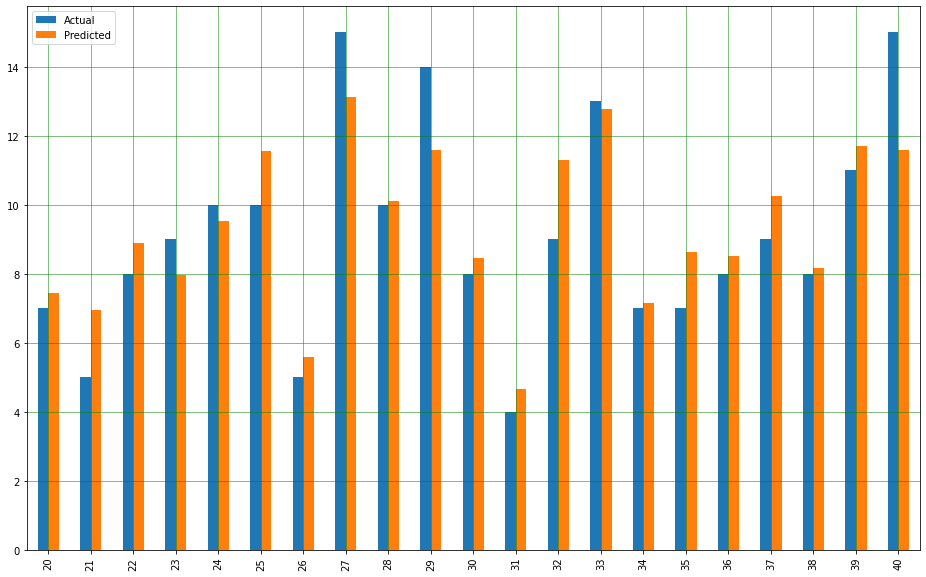

In [ ]:
#Trực quan hóa Dữ liệu thực tế - Dư liệu dự đoán
df_1 = df_linear.iloc[20:41,:]
df_1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
#evaluation Metrics 
from sklearn import metrics
mae_linear = metrics.mean_absolute_error(y_test, y_linear_pred)
mse_linear = metrics.mean_squared_error(y_test, y_linear_pred)
rmse_linear = np.sqrt(metrics.mean_squared_error(y_test, y_linear_pred))
print('1.Linear Regression:')
print('Mean Absolute Error:', mae_linear)  
print('Mean Squared Error:', mse_linear)  
print('Root Mean Squared Error:', rmse_linear)

1.Linear Regression:
Mean Absolute Error: 1.5815705715179202
Mean Squared Error: 5.0068785487799286
Root Mean Squared Error: 2.237605539137747


In [ ]:
#Thực hiện dự đoán với dữ liệu mới (abalone_new).
#Dự đoán tuổi của nó:
y_linear_new = lregress.predict(abalone_new)
y_linear_new

array([7.18315454])

In [ ]:
#Cập nhật vào Bảng tổng hợp kết quả của các Model
df.iloc[0,1:5] = [mae_linear,mse_linear,rmse_linear,y_linear_new]
print(df)

                        Name Model       MAE       MSE      RMSE   Abalone
Model_1          Linear Regression  1.581571  5.006879  2.237606  7.183155
Model_2      Polynomial Regression  0.000000  0.000000  0.000000  0.000000
Model_3  Support Vector Regression  0.000000  0.000000  0.000000  0.000000
Model_4   Decision Tree Regression  0.000000  0.000000  0.000000  0.000000
Model_5   Random Forest Regression  0.000000  0.000000  0.000000  0.000000


Thực hiện lưu model vào ổ đĩa để sau sử dụng ko phải Train

In [ ]:
import pickle
#save model to disk
filename = '/content/drive/My Drive/Colab Notebooks/10Project/Data8_All_Regression_Abalone/lreg_model.sav'
pickle.dump(lregress,open(filename,'wb'))


In [ ]:
#load model from disk
filename1 = '/content/drive/My Drive/Colab Notebooks/10Project/Data8_All_Regression_Abalone/lreg_model.sav'
load_lres_model = pickle.load(open(filename1,'rb'))
load_lres_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Sử dụng model load này để thực hiện predict

In [ ]:
t = load_lres_model.predict(X_test)
t[:10]

array([13.17014483,  9.10922796, 10.35985364,  5.54120008, 10.65916033,
       12.05100358,  8.26779233, 10.09973617,  8.07089377, 12.28730504])

In [ ]:
#Sử dụng cách khác để lưu và load model: joblib
import sklearn.externals.joblib

#Save model as a pickle in a file
filename = '/content/drive/My Drive/Colab Notebooks/10Project/Data8_All_Regression_Abalone/lreg_model.pkl'
joblib.dump(lregress,filename)


['/content/drive/My Drive/Colab Notebooks/10Project/Data8_All_Regression_Abalone/lreg_model.pkl']

In [ ]:
#Load model and predict 
load_lres_model2 = joblib.load(filename)
t2 = load_lres_model2.predict(X_test)
t2[:10]

array([13.17014483,  9.10922796, 10.35985364,  5.54120008, 10.65916033,
       12.05100358,  8.26779233, 10.09973617,  8.07089377, 12.28730504])

In [ ]:
load_lres_model2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Thực hiện dự đoán cho trường hợp có giá trị mới  với model được load lại: 

In [ ]:
#if we wish to predict by manually entering the values then we have #to put number of values = number of columns, representing each #value to its corresponding column
ring_new = load_lres_model2.predict([[1.0,1.0,0.55,0.45,0.15,0.91,0.577,0.243,0.33]])
print(ring_new)

[6.42827147]


### 2) Polynomial Regression
---
In polynomial regression, we have a polynomial equation of degree n represented as:

![alt text](https://miro.medium.com/max/1400/1*suD6z8S4q2_d5gkXXAEEiQ.png)


In [ ]:
dataset = ct.fit_transform(data)
dataset

array([[ 0.    ,  0.    ,  1.    , ...,  0.101 ,  0.15  , 15.    ],
       [ 0.    ,  0.    ,  1.    , ...,  0.0485,  0.07  ,  7.    ],
       [ 1.    ,  0.    ,  0.    , ...,  0.1415,  0.21  ,  9.    ],
       ...,
       [ 0.    ,  0.    ,  1.    , ...,  0.2875,  0.308 ,  9.    ],
       [ 1.    ,  0.    ,  0.    , ...,  0.261 ,  0.296 , 10.    ],
       [ 0.    ,  0.    ,  1.    , ...,  0.3765,  0.495 , 12.    ]])

In [ ]:
dataset.shape

(4177, 11)

In [ ]:
dataset[0]

array([ 0.    ,  0.    ,  1.    ,  0.455 ,  0.365 ,  0.095 ,  0.514 ,
        0.2245,  0.101 ,  0.15  , 15.    ])

In [ ]:
X=dataset[:,1:10]
y=dataset[:,-1]

In [ ]:
X[1]

array([0.    , 1.    , 0.35  , 0.265 , 0.09  , 0.2255, 0.0995, 0.0485,
       0.07  ])

In [ ]:
y[1]

7.0

In [ ]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)
#will transform X into 2 more features(^2,#containing features and Square root of features)
#To view the X-plot features
print(X_poly[0])
#build up the regression(poly) model
#poly_reg.fit(X_poly, y)

[1.         0.         1.         0.455      0.365      0.095
 0.514      0.2245     0.101      0.15       0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.         0.455      0.365      0.095      0.514
 0.2245     0.101      0.15       0.207025   0.166075   0.043225
 0.23387    0.1021475  0.045955   0.06825    0.133225   0.034675
 0.18761    0.0819425  0.036865   0.05475    0.009025   0.04883
 0.0213275  0.009595   0.01425    0.264196   0.115393   0.051914
 0.0771     0.05040025 0.0226745  0.033675   0.010201   0.01515
 0.0225    ]


In [ ]:
X_poly.shape

(4177, 55)

In [ ]:
#Tách tập dữ liệu Train - Test

X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 0)
print('XTrain:',X_poly_train.shape)
print('YTrain:',y_poly_train.shape)
print('XTest:',X_poly_test.shape)
print('YTest:',y_poly_test.shape)


XTrain: (3341, 55)
YTrain: (3341,)
XTest: (836, 55)
YTest: (836,)


In [ ]:
#Huấn luyện model Polynomial Linear Regression
poly_reg.fit(X_poly, y)

#y_po_pred = poly_reg.predict(X_test)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [ ]:
#Huấn luyện model sử dụng tham số Poly
linear_reg2 = LinearRegression()
linear_reg2.fit(X_poly_train, y_poly_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Thực hiện chạy trên tập TEST
y_poly_pred = linear_reg2.predict(X_poly_test)

In [ ]:
#We can also compare the actual versus prediction
df_poly = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_poly_pred.flatten()})
df_poly

,Actual,Predicted
0,13,14.375000
1,8,9.500000
2,11,10.257812
3,5,4.914062
4,12,10.718750
...,...,...
831,11,10.589844
832,12,9.234375
833,7,8.121094
834,17,12.742188


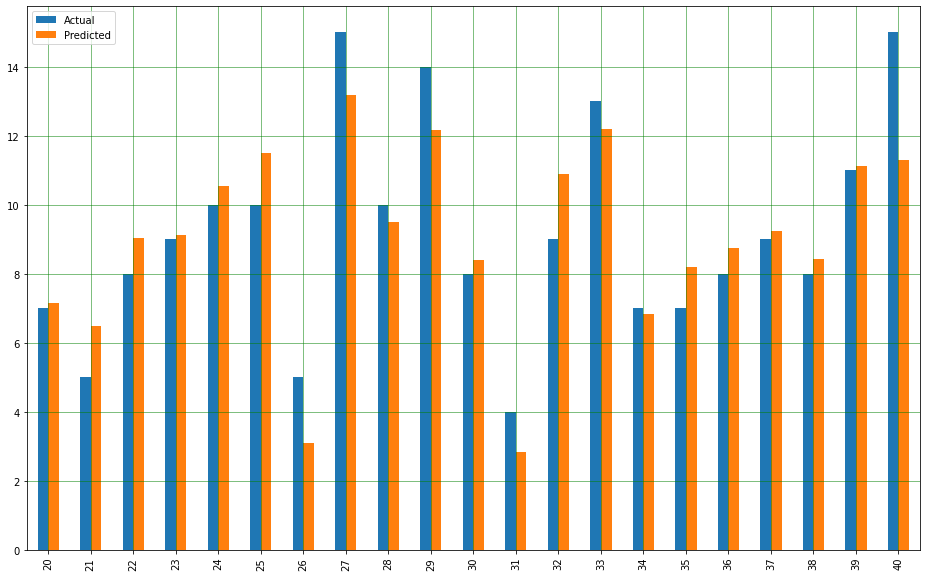

In [ ]:
df_1 = df_poly.iloc[20:41,:]
df_1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
#evaluation Metrics 
from sklearn import metrics
mae_poly = metrics.mean_absolute_error(y_test, y_poly_pred)
mse_poly = metrics.mean_squared_error(y_test, y_poly_pred)
rmse_poly = np.sqrt(metrics.mean_squared_error(y_test, y_poly_pred))
print('2.Polynomial Regression:')
print('Mean Absolute Error:', mae_poly)  
print('Mean Squared Error:', mse_poly)  
print('Root Mean Squared Error:', rmse_poly)

2.Polynomial Regression:
Mean Absolute Error: 1.4998411333732058
Mean Squared Error: 4.634600041585676
Root Mean Squared Error: 2.152812124079962
                        Name Model       MAE       MSE      RMSE
Model_1          Linear Regression  0.000000  0.000000  0.000000
Model_2      Polynomial Regression  1.499841  4.634600  2.152812
Model_3  Support Vector Regression  1.499841  4.634600  2.152812
Model_4   Decision Tree Regression  2.105263  9.055024  3.009157
Model_5   Random Forest Regression  1.533801  4.653916  2.157294


In [ ]:
#Tham số của công thức tính Linear sử dụng Polyfeature bậc 2.
#To get the intercept:
print(linear_reg2.intercept_)
#To view the coefficient values
print(linear_reg2.coef_)

-25452388940496.645
[ 2.54523889e+13 -1.49925409e+13  1.38318873e+13  2.40158116e+01
  2.83408626e+01  1.88033239e+01  5.83824143e+00 -5.46201563e+01
  3.20409068e+01  2.21644036e+01  1.49925409e+13 -1.49820528e+10
 -1.32553682e+01  8.23569961e+00  1.23922555e+01 -2.99614761e+00
  1.07535071e+01  1.02979314e+00  5.34715767e+00 -1.38318873e+13
  1.19994607e+00  3.47346420e+00  1.53474210e-01  2.27573013e+00
 -1.51843298e+00 -8.34843123e+00  2.05944861e-02 -7.32298953e+01
  1.23433273e+02 -3.44960355e+01  1.69944777e-01  6.33135090e+01
 -9.51531308e+01 -1.57163086e+01 -1.41083008e+02  1.03007812e+01
  2.67792969e+01 -1.86660156e+01  1.93833008e+01  1.14597168e+01
 -7.79296875e+00  6.35633240e+01 -2.54628906e+01 -1.76139526e+02
 -3.97604980e+01 -7.38281250e-01 -4.14003906e+01  1.87128906e+01
  7.82226562e-01  4.69311523e+01  2.24191895e+01  7.61575317e+00
  1.44853516e+01 -7.56005859e+00 -7.88916016e+00]


In [ ]:
#Dự đoán với giá trị mới (abalone_new):
#Chuyển đổi thông số của con bào ngư mới về polyfeature bậc 2
x_new_poly = poly_reg.fit_transform(abalone_new)
print(x_new_poly)
y_poly_new = linear_reg2.predict(x_new_poly)
print(y_poly_new)

[[1.       0.       0.       0.55     0.45     0.15     0.91     0.577
  0.243    0.33     0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.3025   0.2475   0.0825   0.5005   0.31735
  0.13365  0.1815   0.2025   0.0675   0.4095   0.25965  0.10935  0.1485
  0.0225   0.1365   0.08655  0.03645  0.0495   0.8281   0.52507  0.22113
  0.3003   0.332929 0.140211 0.19041  0.059049 0.08019  0.1089  ]]
[8.1171875]


In [ ]:
#Cập nhật vào Bảng tổng hợp kết quả của các Model
df.iloc[1,1:5] = [mae_poly,mse_poly,rmse_poly,y_poly_new]
print(df)


                        Name Model       MAE       MSE      RMSE   Abalone
Model_1          Linear Regression  1.581571  5.006879  2.237606  7.183155
Model_2      Polynomial Regression  1.499841  4.634600  2.152812  8.117188
Model_3  Support Vector Regression  0.000000  0.000000  0.000000  0.000000
Model_4   Decision Tree Regression  0.000000  0.000000  0.000000  0.000000
Model_5   Random Forest Regression  0.000000  0.000000  0.000000  0.000000


Lưu model sử dụng Polyfeature vào Disk để sử dụng về sau:

In [ ]:
import pickle
#save model to disk
filename = '/content/drive/My Drive/Colab Notebooks/10Project/Data8_All_Regression_Abalone/poly_model.sav'
pickle.dump(linear_reg2,open(filename,'wb'))

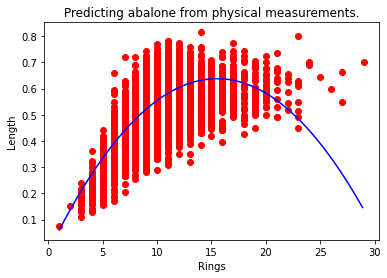

In [ ]:
# Visualizing the Polynomial Regression results (for smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid,linear_reg2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Predicting abalone from physical measurements.')
plt.xlabel('Rings')
plt.ylabel('Length')
plt.show()

In [ ]:
print('Predicting a new result with Linear Regression:')
print(linear_reg.predict([[10]]))

print('Predicting a new result with Polynomial Regression:')
print(linear_reg2.predict(poly_reg.fit_transform([[10]])))

Predicting a new result with Linear Regression:
[0.52536725]
Predicting a new result with Polynomial Regression:
[0.55452649]


### 3) Support Vector Regression(SVR)
---
Support Vector Regression works on the principle of Support Vector Machine SVM.

In brief the principle working of SVM is to find the nearest data point(either class) with the help of hyper-plane. This distance is called as Margin

In [ ]:
#Fitting SVR to the dataset 
from sklearn.svm import SVR
SVRreg = SVR(kernel = 'rbf')
SVRreg.fit(X_train, y_train)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
#Dự đoán với model SVR trên tập dữ liệu Test
y_svr_pred = SVRreg.predict(X_test)

In [ ]:
#We can also compare the actual versus prediction
df_svr = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_svr_pred.flatten()})
df_svr

,Actual,Predicted
0,13,12.603477
1,8,8.782028
2,11,10.252402
3,5,4.869739
4,12,10.646227
...,...,...
831,11,10.265732
832,12,8.792424
833,7,7.730969
834,17,11.617789


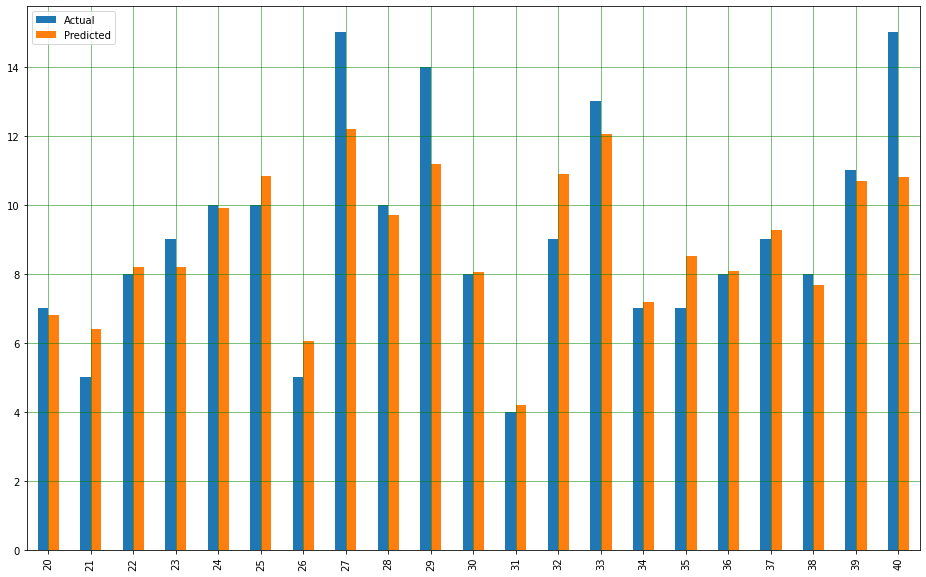

In [ ]:
#Trực quan hóa Dữ liệu thực tế - Dữ liệu dự đoán
df_1 = df_svr.iloc[20:41,:]
df_1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
#evaluation Metrics 
from sklearn import metrics
mae_svr = metrics.mean_absolute_error(y_test, y_svr_pred)
mse_svr = metrics.mean_squared_error(y_test, y_svr_pred)
rmse_svr = np.sqrt(metrics.mean_squared_error(y_test, y_svr_pred))
print('3.Support Vector Regression:')
print('Mean Absolute Error:', mae_svr)  
print('Mean Squared Error:', mse_svr)  
print('Root Mean Squared Error:', rmse_svr)

3.Support Vector Regression:
Mean Absolute Error: 1.5310735719208763
Mean Squared Error: 5.275919006642129
Root Mean Squared Error: 2.2969368747621535


In [ ]:
#Thực hiện dự đoán với dữ liệu mới.
#Dự đoán tuổi của nó:
y_svr_new = SVRreg.predict(abalone_new)
y_svr_new

array([8.29468764])

In [ ]:
#Cập nhật vào Bảng tổng hợp kết quả của các Model
df.iloc[2,1:5] = [mae_svr,mse_svr,rmse_svr,y_svr_new]
print(df)

                        Name Model       MAE       MSE      RMSE   Abalone
Model_1          Linear Regression  1.581571  5.006879  2.237606  7.183155
Model_2      Polynomial Regression  1.499841  4.634600  2.152812  8.117188
Model_3  Support Vector Regression  1.531074  5.275919  2.296937  8.294688
Model_4   Decision Tree Regression  0.000000  0.000000  0.000000  0.000000
Model_5   Random Forest Regression  0.000000  0.000000  0.000000  0.000000


Lưu model SVR vào Disk để sau sử dụng

In [ ]:
import pickle
#save model to disk
filename = '/content/drive/My Drive/Colab Notebooks/10Project/Data8_All_Regression_Abalone/svr_model.sav'
pickle.dump(SVRreg,open(filename,'wb'))

### 4) Decision Tree Regression
---

In [ ]:
#Huấn luyện model với dữ liệu Train
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train,y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
#Thực hiện chạy model trên tập TEST
y_dt_pred = dt_model.predict(X_test)


In [ ]:
#We can also compare the actual versus prediction
df_dt = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_dt_pred.flatten()})
df_dt

,Actual,Predicted
0,13,11.0
1,8,9.0
2,11,10.0
3,5,4.0
4,12,9.0
...,...,...
831,11,10.0
832,12,8.0
833,7,7.0
834,17,15.0


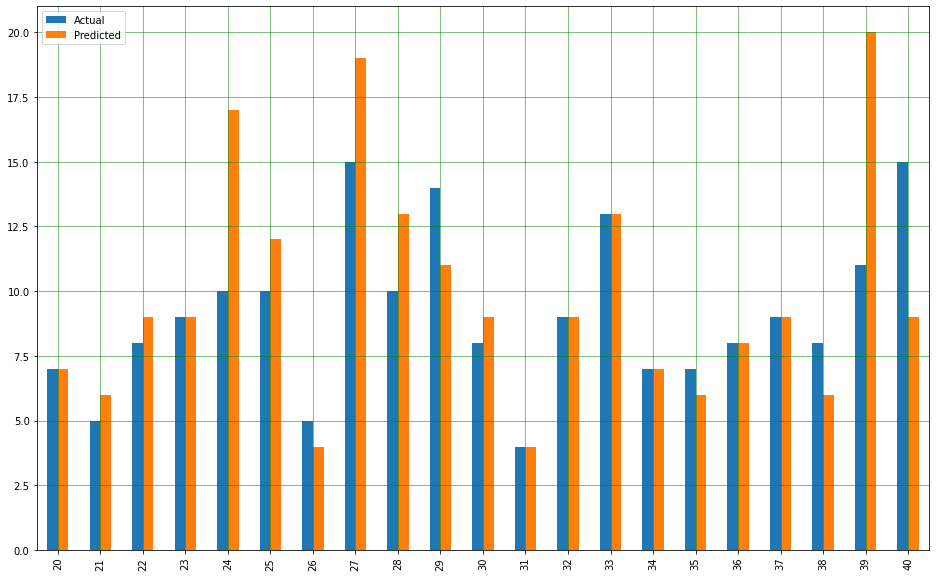

In [ ]:
#Trực quan hóa Dữ liệu thực tế - Dữ liệu dự đoán
df_1 = df_dt.iloc[20:41,:]
df_1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
#evaluation Metrics 
from sklearn import metrics
mae_dt = metrics.mean_absolute_error(y_test, y_dt_pred)
mse_dt = metrics.mean_squared_error(y_test, y_dt_pred)
rmse_dt = np.sqrt(metrics.mean_squared_error(y_test, y_dt_pred))
print('4.Decision Tree Regression:')
print('Mean Absolute Error:', mae_dt)  
print('Mean Squared Error:', mse_dt)  
print('Root Mean Squared Error:', rmse_dt)

4.Decision Tree Regression:
Mean Absolute Error: 2.1052631578947367
Mean Squared Error: 9.055023923444976
Root Mean Squared Error: 3.00915667977674


In [ ]:
#Thực hiện dự đoán với dữ liệu mới.
#Dự đoán tuổi của nó:
y_dt_new = dt_model.predict(abalone_new)
y_dt_new

array([8.])

In [ ]:
#Cập nhật vào Bảng tổng hợp kết quả của các Model
df.iloc[3,1:5] = [mae_dt,mse_dt,rmse_dt,y_dt_new]
print(df)

                        Name Model       MAE       MSE      RMSE   Abalone
Model_1          Linear Regression  1.581571  5.006879  2.237606  7.183155
Model_2      Polynomial Regression  1.499841  4.634600  2.152812  8.117188
Model_3  Support Vector Regression  1.531074  5.275919  2.296937  8.294688
Model_4   Decision Tree Regression  2.105263  9.055024  3.009157  8.000000
Model_5   Random Forest Regression  0.000000  0.000000  0.000000  0.000000


Thực hiện việc lưu model Decision Tree Regression:

In [ ]:
import pickle
#save model to disk
filename = '/content/drive/My Drive/Colab Notebooks/10Project/Data8_All_Regression_Abalone/decisiontree_model.sav'
pickle.dump(dt_model,open(filename,'wb'))

### 5) Random Forest For Regression
---
What is random forest?

Random Forest is the upgrade version of decision trees. The name itself refers it consists of a large number of individual decision trees that operates as an ensemble. Thus we are combining the predictive power of several decision trees to give more accuracy.
![alt text](https://miro.medium.com/max/1400/1*NmcAJBVvZs98rAG_GcoEDg.jpeg)

In [ ]:
#huấn luyện model Random Forest trên tập TRAIN
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=500, random_state = 0)
rf_model.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
#Chạy model đã huấn luyện trên tập TEST
y_rf_pred =  rf_model.predict(X_test)


In [ ]:
#We can also compare the actual versus prediction
df_rf = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_rf_pred.flatten()})
df_rf

,Actual,Predicted
0,13,15.084
1,8,9.364
2,11,11.144
3,5,4.930
4,12,11.350
...,...,...
831,11,10.552
832,12,9.712
833,7,7.344
834,17,14.728


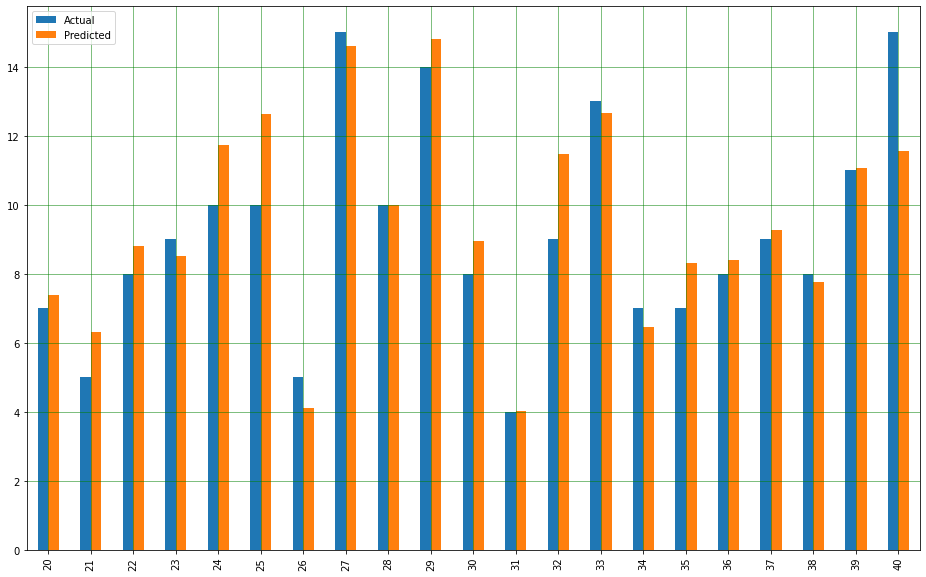

In [ ]:
#Trực quan hóa Dữ liệu thực tế - Dữ liệu dự đoán
df_1 = df_rf.iloc[20:41,:]
df_1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
#evaluation Metrics 
from sklearn import metrics
mae_rf = metrics.mean_absolute_error(y_test, y_rf_pred)
mse_rf = metrics.mean_squared_error(y_test, y_rf_pred)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_rf_pred))
print('5.Random Forest Regression:')
print('Mean Absolute Error:', mae_rf)  
print('Mean Squared Error:', mse_rf)  
print('Root Mean Squared Error:', rmse_rf)

5.Random Forest Regression:
Mean Absolute Error: 1.5338014354066987
Mean Squared Error: 4.653916253588517
Root Mean Squared Error: 2.1572937337294884


In [ ]:
#Thực hiện dự đoán với dữ liệu mới.
#Dự đoán tuổi của nó:
y_rf_new = rf_model.predict(abalone_new)
y_rf_new

array([10.344])

In [ ]:
#Cập nhật vào Bảng tổng hợp kết quả của các Model
df.iloc[4,1:5] = [mae_rf,mse_rf,rmse_rf,y_rf_new]
print(df)

                        Name Model       MAE       MSE      RMSE    Abalone
Model_1          Linear Regression  1.581571  5.006879  2.237606   7.183155
Model_2      Polynomial Regression  1.499841  4.634600  2.152812   8.117188
Model_3  Support Vector Regression  1.531074  5.275919  2.296937   8.294688
Model_4   Decision Tree Regression  2.105263  9.055024  3.009157   8.000000
Model_5   Random Forest Regression  1.533801  4.653916  2.157294  10.344000


In [ ]:
#Lưu bảng tổng hợp ra file excel:
file_df = '/content/drive/My Drive/Colab Notebooks/10Project/Data8_All_Regression_Abalone/all_model_summery.xlsx'
df.to_excel(file_df,header=True,index=True,sheet_name='Model Regression', float_format='%.3f')

Thực hiện việc lưu model Random Forest Regression:

In [ ]:
import pickle
#save model to disk
filename = '/content/drive/My Drive/Colab Notebooks/10Project/Data8_All_Regression_Abalone/randomforest_model.sav'
pickle.dump(rf_model,open(filename,'wb'))